<a href="https://colab.research.google.com/github/traceswrldd/movie_recommendations_ML/blob/main/EDA_movies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

/tmp/ipython-input-547165800.py:2: DtypeWarning: Columns (0,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,

In [ ]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [ ]:
credits.head()

,movie_id,title,cast,crew,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 990,Unnamed: 991,Unnamed: 992,Unnamed: 993,Unnamed: 994,Unnamed: 995,Unnamed: 996,Unnamed: 997,Unnamed: 998,Unnamed: 999
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print(f'The movies dataset has {movies.shape[0]} rows and {movies.shape[1]} columns')
print (f'The credits dataset has {credits.shape[0]} rows and {credits.shape[1]} columns')

The movies dataset has 4803 rows and 20 columns
The credits dataset has 1499 rows and 1000 columns


In [ ]:
# merge both dataframes using the title
movies = pd.merge(movies, credits, on='title')

In [ ]:
# empty columns in the movies and credits dataset
print(f' In the movies dataset these rows have empty values:\n{movies.isnull().sum()}')

 In the movies dataset these rows have empty values:
budget             0
genres             0
homepage         793
id                 0
keywords           0
                ... 
Unnamed: 995    1492
Unnamed: 996    1492
Unnamed: 997    1492
Unnamed: 998    1492
Unnamed: 999    1492
Length: 1019, dtype: int64


In [ ]:

movies.dropna(thresh=movies.shape[0]*0.95, axis=1, inplace=True)

In [ ]:
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
#Drop rows in the tagline and crew column that are missing
movies.dropna(subset=['crew'], inplace=True)

In [ ]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [ ]:
#Check if there are no more missin rows in the dataframe
movies.isnull().sum()

,0
budget,0
genres,0
id,0
keywords,0
original_language,0
original_title,0
overview,0
popularity,0
production_companies,0
production_countries,0


In [ ]:
movies.tail()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id,cast,crew
1487,30000000,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,Goal!: The Dream Begins,"Like millions of kids around the world, Santia...",16.541791,"[{""name"": ""Touchstone Pictures"", ""id"": 9195}, ...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",...,27610873,118.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Goal!: The Dream Begins,6.6,238,9763.0,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de..."
1488,30000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,Safe,After a former elite agent rescues a 12-year-o...,31.926950,"[{""name"": ""Lawrence Bender Productions"", ""id"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,40346186,94.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Safe,6.3,799,72387.0,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de..."
1489,33000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,Pushing Tin,"Two air traffic controllers (John Cusack, Bill...",9.060642,"[{""name"": ""Regency Enterprises"", ""id"": 508}, {...","[{""iso_3166_1"": ""DE"", ""name"": ""Germany""}, {""is...",...,0,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pushing Tin,5.7,116,12596.0,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de..."
1490,11000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,괴물,Gang-du is a dim-witted man working at his fat...,27.655270,"[{""name"": ""Cineclick Asia"", ""id"": 685}, {""name...","[{""iso_3166_1"": ""KR"", ""name"": ""South Korea""}]",...,88489643,119.0,"[{""iso_639_1"": ""ko"", ""name"": ""\ud55c\uad6d\uc5...",Released,The Host,6.7,537,72710,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de..."
1491,1377800,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 12, ""...",2661,"[{""id"": 339, ""name"": ""submarine""}, {""id"": 849,...",en,Batman,The Dynamic Duo faces four super-villains who ...,9.815394,"[{""name"": ""Twentieth Century Fox Film Corporat...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman,6.1,203,268.0,"[{""cast_id"": 5, ""character"": ""Jack Napier/The ...","[{""credit_id"": ""52fe422fc3a36847f800aa4b"", ""de..."


In [ ]:
movies.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [ ]:
#Drop any column that will not be used in building the content based filtering and collaborative filtering models for the recommendation system
# Keep important columns
movies = movies[['genres', 'id', 'keywords', 'original_language', 'overview', 'release_date', 'runtime', 'title', 'vote_average', 'vote_count', 'cast', 'crew']]

In [ ]:
movies.head()

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [ ]:
movies['vote_average'].describe()

,vote_average
count,1489.000000
mean,6.183412
std,0.821379
min,0.000000
25%,5.700000
50%,6.200000
75%,6.700000
max,8.300000


In [ ]:
movies['rating_group'] = movies['vote_average'].apply(lambda x: int(x))
display(movies)

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew,rating_group
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,"Like millions of kids around the world, Santia...",2005-06-06,118.0,Goal!: The Dream Begins,6.6,238,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de...",6
1488,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,After a former elite agent rescues a 12-year-o...,2012-04-16,94.0,Safe,6.3,799,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de...",6
1489,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,"Two air traffic controllers (John Cusack, Bill...",1999-04-23,124.0,Pushing Tin,5.7,116,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",5
1490,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,Gang-du is a dim-witted man working at his fat...,2006-07-27,119.0,The Host,6.7,537,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de...",6


In [ ]:
ratings_count = movies['rating_group'].value_counts()
print(ratings_count)

rating_group
6    639
5    487
7    262
4     77
8     14
3      8
2      1
0      1
Name: count, dtype: int64


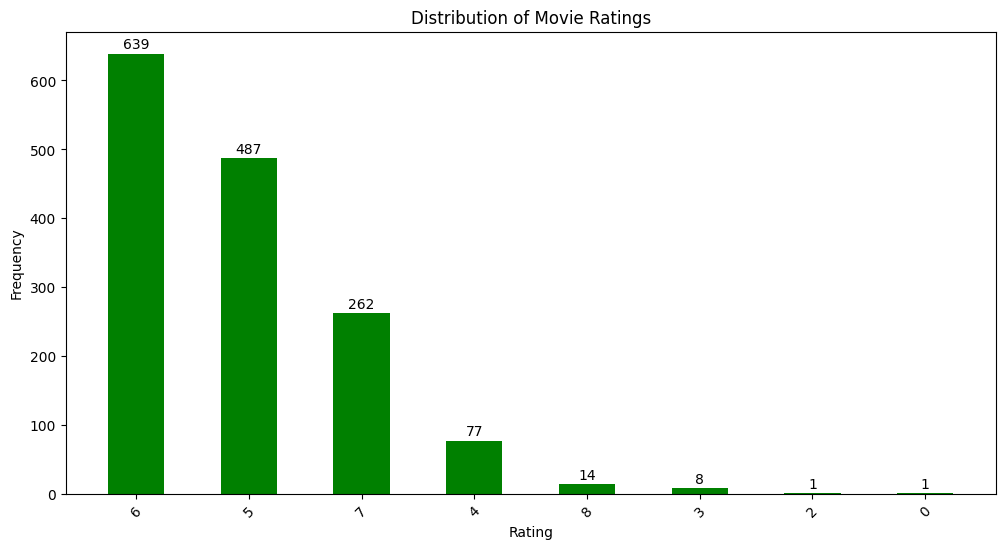

In [ ]:
#plot 1
x_pos = np.arange(len(ratings_count))
plt.figure(figsize=(12, 6))
bars = plt.bar(x_pos, ratings_count.values, width=0.5, color='green')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(x_pos, ratings_count.index, rotation=45)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 3, str(yval), ha='center', va='bottom')
plt.show()


In [ ]:
average_ratings = movies.groupby('id')['rating_group'].mean()
print(average_ratings)


id
12        7.0
13        8.0
18        7.0
22        7.0
24        7.0
         ... 
336004    5.0
347969    4.0
365222    6.0
381902    6.0
417859    6.0
Name: rating_group, Length: 1489, dtype: float64


In [ ]:
movie_stats = movies.groupby('id').agg(
    mean=('rating_group', 'mean'),
    vote_count=('vote_count', 'sum'))

In [ ]:
movie_stats

,mean,vote_count
id,,
12,7.0,6122
13,8.0,7927
18,7.0,3885
22,7.0,6985
24,7.0,4949
...,...,...
336004,5.0,318
347969,4.0,388
365222,6.0,379


In [ ]:
# Find the movies with the top 10 highest ratings
top_10_movies = movie_stats.sort_values(by='mean', ascending=False).head(10)
top_10_movies

,mean,vote_count
id,,
27205,8.0,13752
550,8.0,9413
155,8.0,12002
122,8.0,8064
120,8.0,8705
161795,8.0,1
497,8.0,4048
13,8.0,7927
423,8.0,1864


In [ ]:
ratings_count_per_movie = movies.groupby('id')['vote_count'].first()

In [ ]:
m = ratings_count_per_movie.quantile(0.90)
m

np.float64(3536.2000000000016)

In [ ]:
# the average rating across all movies (c)
C = movies['rating_group'].mean()

In [ ]:
# Apply the weighted rating
movie_stats['weighted_rating'] = (
    (movie_stats['vote_count'] / (movie_stats['vote_count'] + m) * movie_stats['mean']) +
    (m / (movie_stats['vote_count'] + m) * C)
)


In [ ]:
movie_stats

,mean,vote_count,weighted_rating
id,,,
12,7.0,6122,6.539197
13,8.0,7927,7.303272
18,7.0,3885,6.400295
22,7.0,6985,6.576994
24,7.0,4949,6.475495
...,...,...,...
336004,5.0,318,5.680263
347969,4.0,388,5.569255
365222,6.0,379,5.766467


In [ ]:
top_10_by_weighted_average = movie_stats.nlargest(10, 'weighted_rating')
top_10_by_weighted_average


,mean,vote_count,weighted_rating
id,,,
27205,8.0,13752,7.538024
155,8.0,12002,7.485994
157336,8.0,10867,7.445489
550,8.0,9413,7.383226
120,8.0,8705,7.347553
122,8.0,8064,7.311501
13,8.0,7927,7.303272
121,8.0,7487,7.275462
150540,8.0,6560,7.208937


In [ ]:
wa_ids = top_10_by_weighted_average.index.tolist()
sa_ids = top_10_movies.index.tolist()

In [ ]:
wa_df = pd.DataFrame({'id': wa_ids, 'wa_position': range(1, 11)})
sa_df = pd.DataFrame({'id': sa_ids, 'sa_position': range(1, 11)})

In [ ]:
comparison = pd.merge(wa_df, sa_df, on='id', how='outer')

In [ ]:
comparison['in_both'] = comparison['wa_position'].notna() & comparison['sa_position'].notna()

In [ ]:
comparison = comparison.sort_values(by=['wa_position', 'sa_position'], na_position='last')
print(comparison)

        id  wa_position  sa_position  in_both
9    27205          1.0          1.0     True
4      155          2.0          3.0     True
11  157336          3.0          NaN    False
7      550          4.0          2.0     True
1      120          5.0          5.0     True
3      122          6.0          4.0     True
0       13          7.0          8.0     True
2      121          8.0          NaN    False
10  150540          9.0          NaN    False
8     8587         10.0         10.0     True
12  161795          NaN          6.0    False
6      497          NaN          7.0    False
5      423          NaN          9.0    False


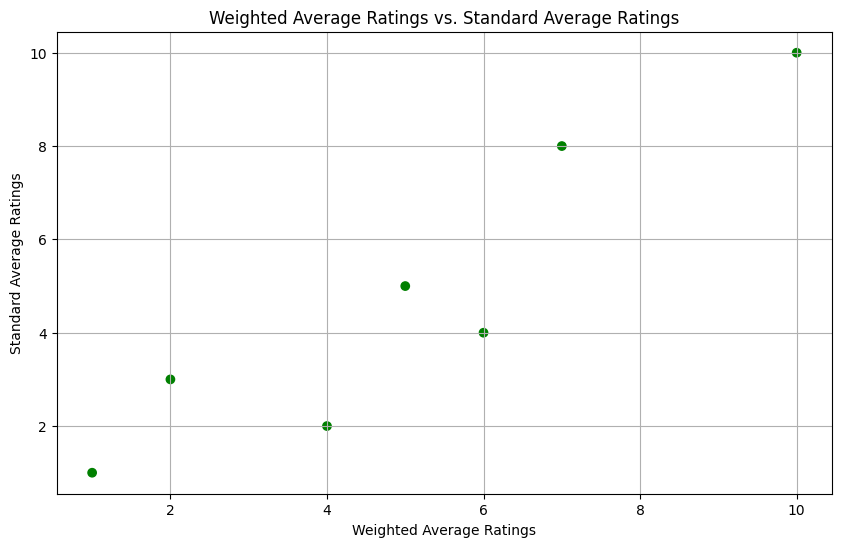

In [ ]:
#plot 2
plt.figure(figsize=(10, 6))
plt.scatter(comparison['wa_position'], comparison['sa_position'], c=comparison['in_both'].map({True: 'green', False: 'red'}))
plt.title('Weighted Average Ratings vs. Standard Average Ratings')
plt.xlabel('Weighted Average Ratings')
plt.ylabel('Standard Average Ratings')
plt.grid(True)
plt.show()

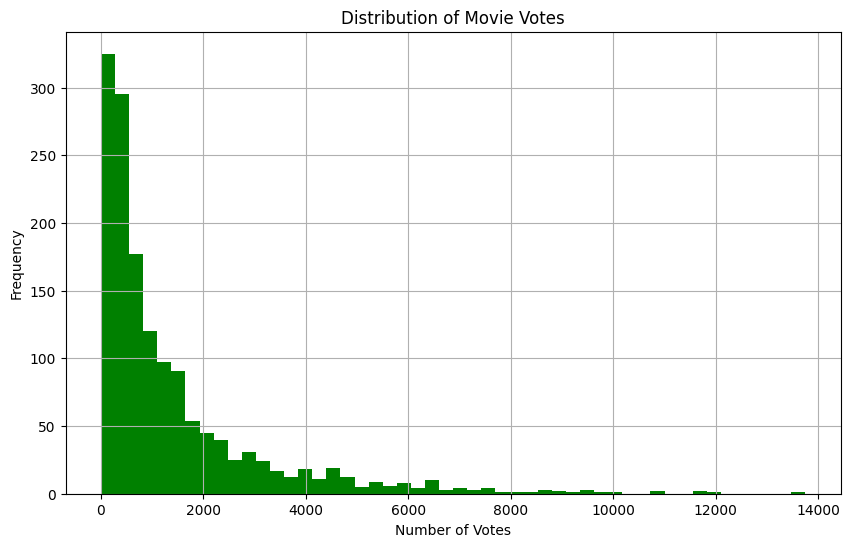

In [ ]:
# plot 3 movie votes
plt.figure(figsize=(10, 6))
plt.hist(movies['vote_count'], bins=50, color='green')
plt.title('Distribution of Movie Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

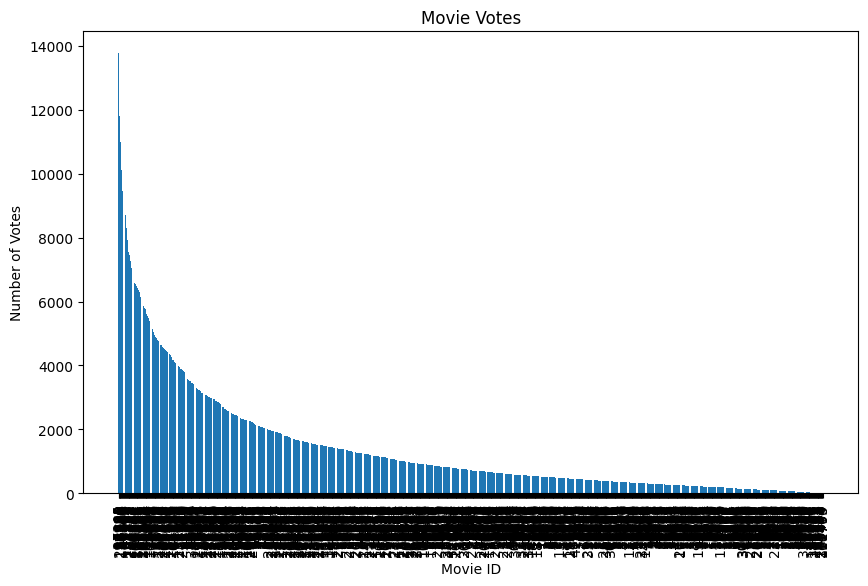

In [ ]:
# Get the vote counts for each movie and sort in descending order
movie_vote_counts = movie_stats['vote_count'].sort_values(ascending=False)

#plot 4
plt.figure(figsize=(10, 6))
plt.bar(movie_vote_counts.index.astype(str), movie_vote_counts.values)
plt.title('Movie Votes')
plt.xlabel('Movie ID')
plt.ylabel('Number of Votes')
plt.xticks(rotation=90)
plt.show()

In [ ]:
movies.columns

Index(['genres', 'id', 'keywords', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'rating_group'],
      dtype='object')

In [ ]:
movies

,genres,id,keywords,original_language,overview,release_date,runtime,title,vote_average,vote_count,cast,crew,rating_group
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,"In the 22nd century, a paraplegic Marine is di...",2009-12-10,162.0,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,"Captain Barbossa, long believed to be dead, ha...",2007-05-19,169.0,Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,A cryptic message from Bond’s past sends him o...,2015-10-26,148.0,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,Following the death of District Attorney Harve...,2012-07-16,165.0,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,"John Carter is a war-weary, former military ca...",2012-03-07,132.0,John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,"[{""id"": 18, ""name"": ""Drama""}]",9763,"[{""id"": 1946, ""name"": ""restaurant""}, {""id"": 60...",en,"Like millions of kids around the world, Santia...",2005-06-06,118.0,Goal!: The Dream Begins,6.6,238,"[{""cast_id"": 1, ""character"": ""Santiago Munez"",...","[{""credit_id"": ""52fe4528c3a36847f80bfa1d"", ""de...",6
1488,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",72387,"[{""id"": 180366, ""name"": ""broken trachea""}]",en,After a former elite agent rescues a 12-year-o...,2012-04-16,94.0,Safe,6.3,799,"[{""cast_id"": 3, ""character"": ""Luke Wright"", ""c...","[{""credit_id"": ""52fe4868c3a368484e0f716d"", ""de...",6
1489,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",12596,"[{""id"": 271, ""name"": ""competition""}, {""id"": 82...",en,"Two air traffic controllers (John Cusack, Bill...",1999-04-23,124.0,Pushing Tin,5.7,116,"[{""cast_id"": 1, ""character"": ""Nick Falzone"", ""...","[{""credit_id"": ""52fe45039251416c75048bc1"", ""de...",5
1490,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 18, ""nam...",1255,"[{""id"": 1261, ""name"": ""river""}, {""id"": 1880, ""...",ko,Gang-du is a dim-witted man working at his fat...,2006-07-27,119.0,The Host,6.7,537,"[{""cast_id"": 52, ""character"": ""Melanie Stryder...","[{""credit_id"": ""52fe487bc3a368484e0fa919"", ""de...",6


In [ ]:
# 'keywords' column
def convert_keywords(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

movies['keywords'] = movies['keywords'].apply(convert_keywords)


In [ ]:
type(movies['keywords'][0])

list

In [ ]:
# 'genres' column
def convert_genres(obj):
    l = []
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

movies['genres'] = movies['genres'].apply(convert_genres)

In [ ]:
type(movies['genres'][0])

list

In [ ]:
# 'cast' column (top 3 only)
def extract_cast(obj):
    l = []
    count = 0
    for i in ast.literal_eval(obj):
        if count != 3:
            l.append(i['name'])
            count += 1
        else:
            break
    return l

movies['cast'] = movies['cast'].apply(extract_cast)

In [ ]:
type(movies['cast'][0])

list

In [ ]:
movies['crew'] = movies['crew'].apply(lambda x: [x] if x is not None else [])

In [ ]:
type(movies['crew'][0])

list

In [ ]:
# 'overview' column
movies['overview'] = movies['overview'].apply(lambda x: x.split())

In [ ]:
type(movies['overview'][0])

list

In [ ]:
movies.columns

Index(['genres', 'id', 'keywords', 'original_language', 'overview',
       'release_date', 'runtime', 'title', 'vote_average', 'vote_count',
       'cast', 'crew', 'rating_group'],
      dtype='object')

In [ ]:
# Create 'tags' column by combining overview + keywords + genres + cast + crew
movies['tags'] = movies['overview'] + movies['cast'] + movies['crew'] + movies['keywords'] + movies['genres']

In [ ]:
# Remove spaces from tags
movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])

In [ ]:
movies = movies[['id', 'title', 'tags', 'original_language', 'release_date', 'runtime', 'vote_average', 'vote_count', 'rating_group']]
movies

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",en,2015-10-26,148.0,6.3,4466,6
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",en,2012-07-16,165.0,7.6,9106,7
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",en,2012-03-07,132.0,6.1,2124,6
...,...,...,...,...,...,...,...,...,...
1487,9763,Goal!: The Dream Begins,"[Like, millions, of, kids, around, the, world,...",en,2005-06-06,118.0,6.6,238,6
1488,72387,Safe,"[After, a, former, elite, agent, rescues, a, 1...",en,2012-04-16,94.0,6.3,799,6
1489,12596,Pushing Tin,"[Two, air, traffic, controllers, (John, Cusack...",en,1999-04-23,124.0,5.7,116,5
1490,1255,The Host,"[Gang-du, is, a, dim-witted, man, working, at,...",ko,2006-07-27,119.0,6.7,537,6


In [ ]:
movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])

/tmp/ipython-input-832373026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(lambda x: [i.replace(" ", "") for i in x])


In [ ]:
movies.head()

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...",en,2015-10-26,148.0,6.3,4466,6
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...",en,2012-07-16,165.0,7.6,9106,7
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...",en,2012-03-07,132.0,6.1,2124,6


In [ ]:
# Stemming
ps = PorterStemmer()

def stemming(text):
    l = []
    for i in text:
        l.append(ps.stem(i))
    return " ".join(l)

movies['tags'] = movies['tags'].apply(stemming)

/tmp/ipython-input-4100501703.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(stemming)


In [ ]:
movies

,id,title,tags,original_language,release_date,runtime,vote_average,vote_count,rating_group
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa...",en,2009-12-10,162.0,7.2,11800,7
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c...",en,2007-05-19,169.0,6.9,4500,6
2,206647,Spectre,a cryptic messag from bond’ past send him on a...,en,2015-10-26,148.0,6.3,4466,6
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...,en,2012-07-16,165.0,7.6,9106,7
4,49529,John Carter,"john carter is a war-weary, former militari ca...",en,2012-03-07,132.0,6.1,2124,6
...,...,...,...,...,...,...,...,...,...
1487,9763,Goal!: The Dream Begins,"like million of kid around the world, santiago...",en,2005-06-06,118.0,6.6,238,6
1488,72387,Safe,after a former elit agent rescu a 12-year-old ...,en,2012-04-16,94.0,6.3,799,6
1489,12596,Pushing Tin,"two air traffic control (john cusack, billi bo...",en,1999-04-23,124.0,5.7,116,5
1490,1255,The Host,gang-du is a dim-wit man work at hi father' ti...,ko,2006-07-27,119.0,6.7,537,6


In [ ]:
tfidf = TfidfVectorizer(max_features= 500, stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['tags']).toarray()

In [ ]:
tfidf_similarity = cosine_similarity(tfidf_matrix)

#TFIDF Modelling

In [ ]:
wcss = []
k_range = range(1, 11)  # Test k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(tfidf_matrix)  # Use your TF-IDF matrix here
    wcss.append(kmeans.inertia_)

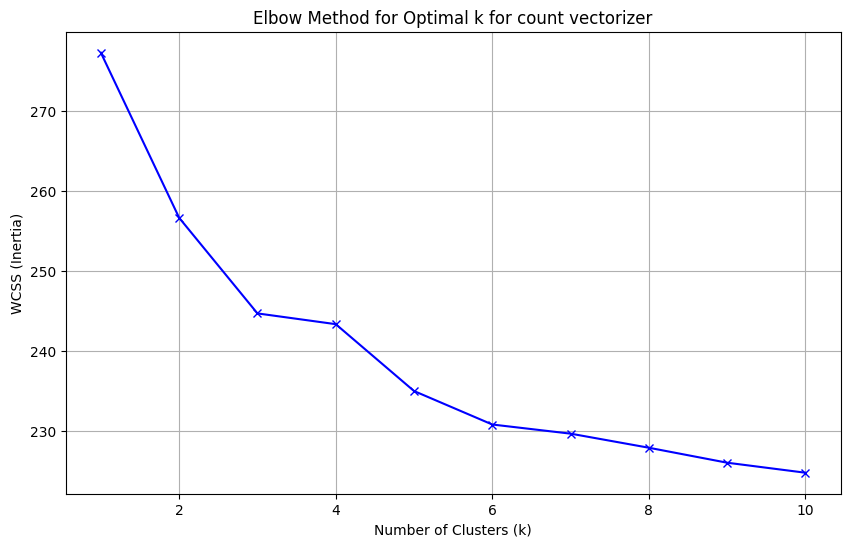

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k for count vectorizer')
plt.grid(True)
plt.show()

In [ ]:
kmeans_tfidf = KMeans(n_clusters=4, random_state=0)
clusters = kmeans_tfidf.fit_predict(tfidf_matrix)

In [ ]:
# t-SNE
tsne_tfidf = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_result_tfidf = tsne_tfidf.fit_transform(tfidf_matrix)

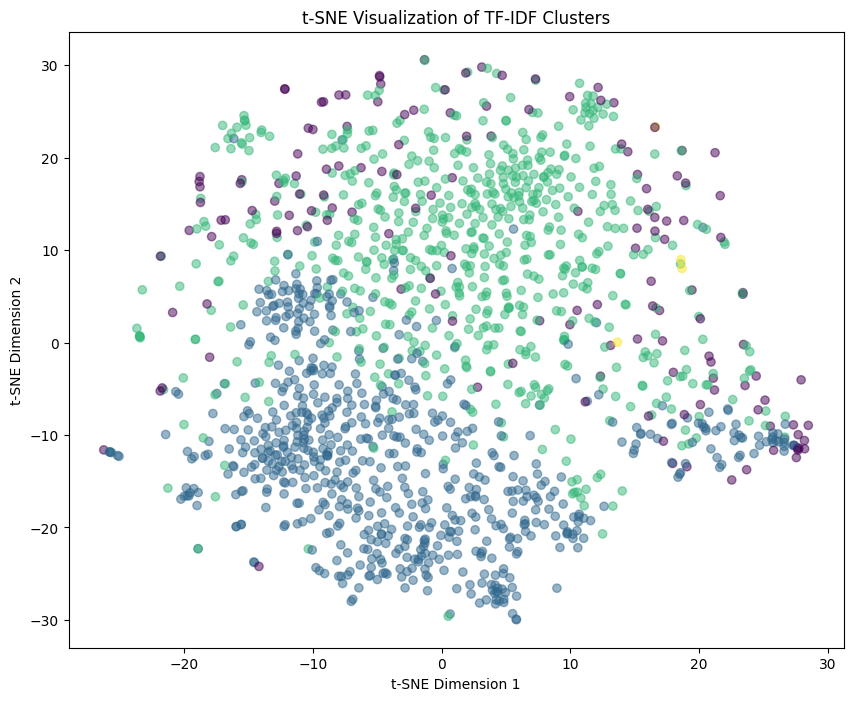

In [ ]:
#plot 4
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result_tfidf[:, 0], tsne_result_tfidf[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of TF-IDF Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
def cluster_enhanced_recommendations_tfidf(movie_title, top_n=10):
    movie_index = movies[movies['title'] == movie_title].index[0]
    movie_cluster = clusters[movie_index]
    # Filter movies to the same cluster
    cluster_movies = movies[clusters == movie_cluster]
    # Compute similarity only within the cluster
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    # Get recommendations from the same cluster
    recommendations = [i for i in distances if clusters[i[0]] == movie_cluster]
    return [movies.iloc[i[0]].title for i in recommendations[1:top_n+1]]

In [112]:
display(f"These recommendations for the movie Avatar with tfidf", cluster_enhanced_recommendations_tfidf("Avatar"));

'These recommendations for the movie Avatar with tfidf'

['The Hunger Games: Mockingjay - Part 1',
 "Ender's Game",
 'The Day After Tomorrow',
 'Captain America: The First Avenger',
 'Cloud Atlas',
 'The Hobbit: The Battle of the Five Armies',
 'Fast Five',
 'Deep Blue Sea',
 'Jupiter Ascending',
 'Edge of Tomorrow']

In [ ]:
def plot_recommendations_tsne_tfidf(movie_title, tsne_result_tfidf):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    recommended_indices = [i[0] for i in distances[1:6]]  # Get top 5 recommendations

    # Get the cluster of the query movie
    movie_cluster = clusters[movie_index]

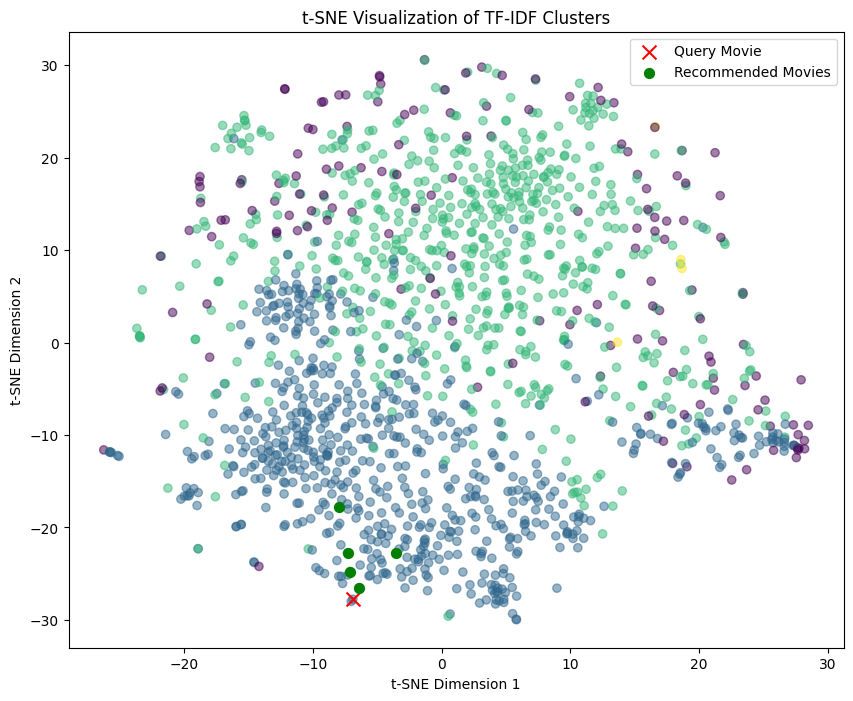

In [ ]:
#plot 5
movie_title = "Avatar"
movie_index = movies[movies['title'] == movie_title].index[0]
distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])
recommended_indices = [i[0] for i in distances[1:6]]  # Get top 5 recommendations

plt.figure(figsize=(10, 8))
#plot all movies, query movies, recommendation movies
plt.scatter(tsne_result_tfidf[:, 0], tsne_result_tfidf[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(tsne_result_tfidf[movie_index, 0], tsne_result_tfidf[movie_index, 1], color='red', marker='x', s=100, label='Query Movie')
plt.scatter(tsne_result_tfidf[recommended_indices, 0], tsne_result_tfidf[recommended_indices, 1], color='green', marker='o', s=50, label='Recommended Movies')
plt.title('t-SNE Visualization of TF-IDF Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [ ]:
def avg_similarity_score_tfidf(movie_title, top_n=5):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(tfidf_similarity[movie_index])), reverse=True, key=lambda x: x[1])

    similarity_scores = [i[1] for i in distances[1:top_n+1]]  # Exclude the movie itself
    return sum(similarity_scores) / len(similarity_scores)

In [ ]:
avg_similarity_score_tfidf("Avatar")

np.float64(0.9781602505155759)

In [ ]:
# Vectorization
vectorizer = CountVectorizer(max_features=500, stop_words='english')
vectors = vectorizer.fit_transform(movies['tags']).toarray()

In [ ]:
# Cosine similarity
count_similarity = cosine_similarity(vectors)

In [ ]:
wcss_count = []
k_range = range(1, 11)  # Test k from 1 to 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(vectors)  # Using count matrix here
    wcss_count.append(kmeans.inertia_)

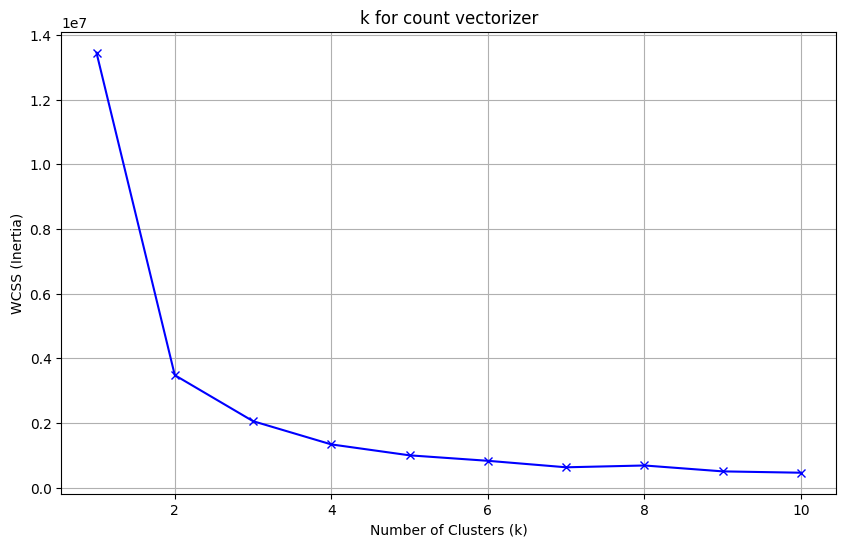

In [ ]:
#plot 6
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss_count, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('k for count vectorizer')
plt.grid(True)
plt.show()

In [ ]:
# t-SNE
tsne_count = TSNE(n_components=2, random_state=0, perplexity=30)
tsne_count_result = tsne_count.fit_transform(vectors)

In [ ]:
# Cluster with KMeans
kmeans_count = KMeans(n_clusters=2, random_state=0)
count_clusters = kmeans_count.fit_predict(vectors)

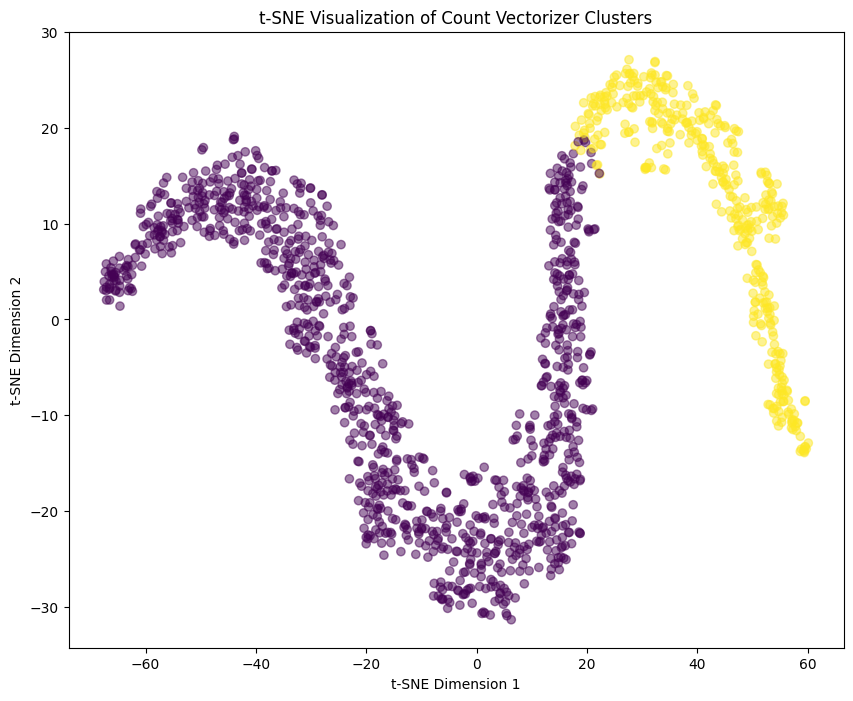

In [ ]:
#plot 7
plt.figure(figsize=(10, 8))
plt.scatter(tsne_count_result[:, 0], tsne_count_result[:, 1], c=count_clusters, cmap='viridis', alpha=0.5)
plt.title('t-SNE Visualization of Count Vectorizer Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()

In [ ]:
def cluster_enhanced_recommendations_count(movie_title, top_n=10):
    movie_index = movies[movies['title'] == movie_title].index[0]
    movie_cluster = count_clusters[movie_index]
    # Filter movies to the same cluster
    cluster_movies = movies[count_clusters == movie_cluster]
    # Compute similarity only within the cluster
    distances = sorted(list(enumerate(count_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    # Get recommendations from the same cluster
    recommendations = [i for i in distances if clusters[i[0]] == movie_cluster]
    return [movies.iloc[i[0]].title for i in recommendations[1:top_n+1]]

In [111]:
display(f"These recommendations for the movie Avatar with count_vectorizer", cluster_enhanced_recommendations_count("Avatar"));

'These recommendations for the movie Avatar with count_vectorizer'

["Ender's Game",
 'The Hunger Games: Mockingjay - Part 1',
 'The Day After Tomorrow',
 'Cloud Atlas',
 'The Hobbit: The Battle of the Five Armies',
 'Dredd',
 'Jupiter Ascending',
 '2012',
 'Contact',
 'Deep Blue Sea']

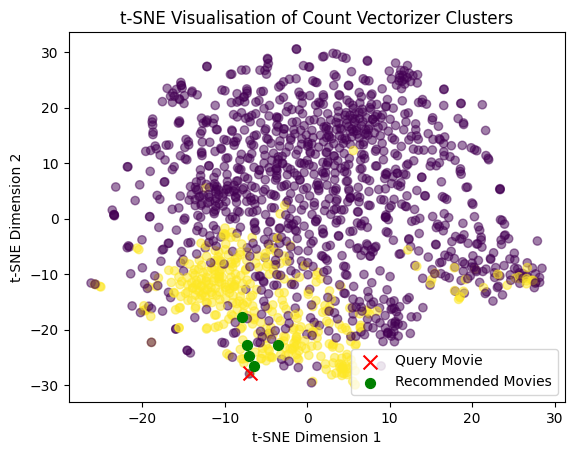

In [114]:
def plot_recommendations_tsne_count(movie_title, tsne_result_tfidf):
    movie_index = movies[movies['title'] == movie_title].index[0]
    distances = sorted(list(enumerate(count_similarity[movie_index])), reverse=True, key=lambda x: x[1])
    recommended_indices = [i[0] for i in distances[1:6]]  # Get top 5 recommendations

    # Get the cluster of the query movie
    movie_cluster = count_clusters[movie_index]

    plt.figure(figsize=(10, 8))
#plot all movies, query movies, recommendations
plt.scatter(tsne_result_tfidf[:, 0], tsne_result_tfidf[:, 1], c=count_clusters, cmap='viridis', alpha=0.5)
plt.scatter(tsne_result_tfidf[movie_index, 0], tsne_result_tfidf[movie_index, 1], color='red', marker='x', s=100, label='Query Movie')
plt.scatter(tsne_result_tfidf[recommended_indices, 0], tsne_result_tfidf[recommended_indices, 1], color='green', marker='o', s=50, label='Recommended Movies')
plt.title('t-SNE Visualisation of Count Vectorizer Clusters')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()

In [115]:
plot_recommendations_tsne_count('Avatar', tsne_count_result)

<Figure size 1000x800 with 0 Axes>

In [116]:
# Save the model and data
pickle.dump(movies, open('model.pkl', 'wb'))
pickle.dump(count_similarity, open('count_similarity.pkl', 'wb'))
pickle.dump(tfidf_similarity, open('tfidf_similarity.pkl', 'wb'))